In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df4 = pd.read_csv('../result_summary/protonet_cp_result_summary.csv')
dfm = pd.read_csv('../result_summary/multitask_cp_result_summary.csv')

In [8]:
after_8 = np.array([float(df4['8_auc_after_train'][i].split('+/-')[0]) for i in range(len(df4))])
after_16 = np.array([float(df4['16_auc_after_train'][i].split('+/-')[0]) for i in range(len(df4))])
after_32 = np.array([float(df4['32_auc_after_train'][i].split('+/-')[0]) for i in range(len(df4))])
after_64 = np.array([float(df4['64_auc_after_train'][i].split('+/-')[0]) for i in range(len(df4))])

In [9]:
before_8 = np.array([float(dfm['8'][i].split('+/-')[0]) for i in range(len(dfm))])
before_16 = np.array([float(dfm['16'][i].split('+/-')[0]) for i in range(len(dfm))])
before_32 = np.array([float(dfm['32'][i].split('+/-')[0]) for i in range(len(dfm))])
before_64 = np.array([float(dfm['64'][i].split('+/-')[0]) for i in range(len(dfm))])

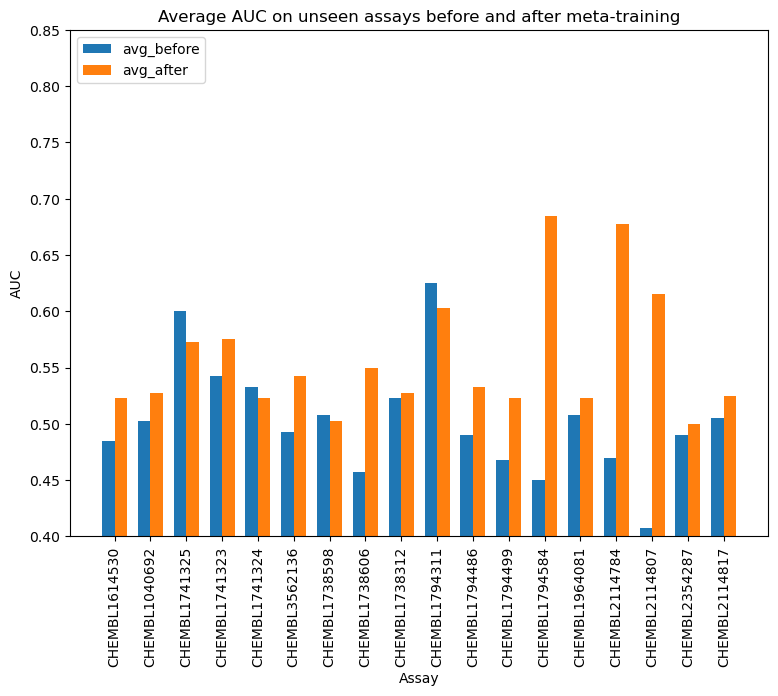

In [10]:
avg_before = np.mean([before_8,before_16, before_32, before_64], axis=0)
avg_after = np.mean([after_8, after_16, after_32, after_64], axis=0)
labels = list(df4['assay_chembl_id'])

x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()
fig.set_size_inches(8,6)
rects1 = ax.bar(x - width/2, avg_before, width, label='avg_before')
rects2 = ax.bar(x + width/2, avg_after, width, label='avg_after')

ax.set_ylabel('AUC')
ax.set_xlabel('Assay')
ax.set_title('Average AUC on unseen assays before and after meta-training')
ax.set_xticks(x, labels)
ax.legend(loc='upper left')

fig.tight_layout()

plt.tick_params(axis='x', labelrotation=90)

plt.ylim([0.4, 0.85])

plt.show()

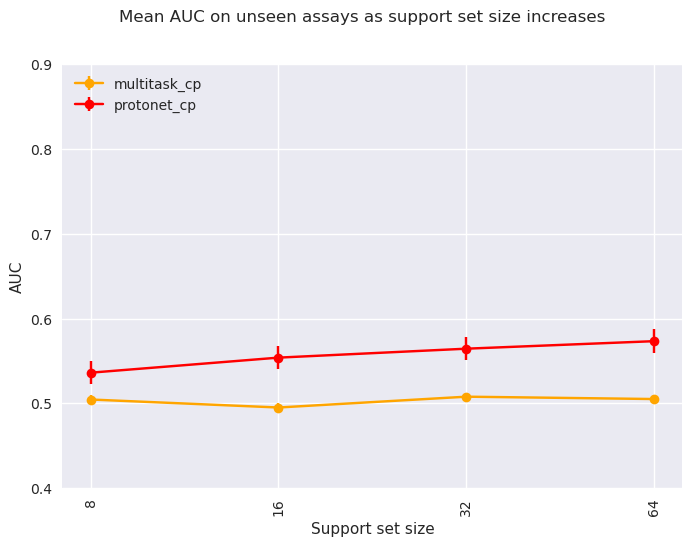

In [11]:
avg_protonet_cp = [np.mean(after_8), np.mean(after_16), np.mean(after_32), np.mean(after_64)]
avg_multitask_cp = [np.mean(before_8), np.mean(before_16), np.mean(before_32), np.mean(before_64)]


labels = ['8', '16', '32', '64']

with plt.style.context(['seaborn-v0_8-deep', 'seaborn']):
    plt.errorbar(labels, avg_multitask_cp, yerr=np.std(avg_multitask_cp), color='orange', label='multitask_cp', marker='o')
    plt.errorbar(labels, avg_protonet_cp, yerr=np.std(avg_protonet_cp), color='red', label='protonet_cp', marker='o')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.ylabel('AUC')
    plt.xlabel('Support set size')
    plt.suptitle('Mean AUC on unseen assays as support set size increases')
    #plt.xticks([])
    plt.legend(loc='upper left')

    #ax.bar_label(rects1, padding=3)
    #ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.tick_params(axis='x', labelrotation=90)

    plt.ylim([0.4, 0.90])
    #plt.savefig("../plots/Model_comparison_lineplot2.png", bbox_inches='tight')
    plt.show()